In [1]:
# Tell PyTorch to store downloaded items to raid
import os
os.environ["TORCH_HOME"] = "/raid/cs152/pytorch"

In [69]:
import torch
from torchvision.models import shufflenet_v2_x0_5, alexnet
from torchvision import transforms
from PIL import Image

import json

In [70]:
# model = shufflenet_v2_x0_5(pretrained=True, progress=True)
model = alexnet(pretrained=True, progress=True)

In [71]:
batch_size = 5
fake_images = torch.randn(batch_size, 3, 224, 224)
fake_images.shape

torch.Size([5, 3, 224, 224])

In [72]:
yhat = model(fake_images)
yhat.shape

torch.Size([5, 1000])

In [73]:
predicted_class_indices = yhat.argmax(1)
predicted_class_indices

tensor([735, 735, 735, 735, 741])

In [74]:
with open("/raid/cs152/pytorch/imagenet_class_index.json") as json_file:
    labels = json.load(json_file)

In [75]:
for cls_index in predicted_class_indices:
    print(labels[str(cls_index.item())])

['n03980874', 'poncho']
['n03980874', 'poncho']
['n03980874', 'poncho']
['n03980874', 'poncho']
['n03998194', 'prayer_rug']


In [76]:
import matplotlib.pyplot as plt

In [77]:
fake_banana = fake_images[0]
fake_banana = fake_banana.permute(1, 2, 0)
fake_banana.shape

torch.Size([224, 224, 3])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


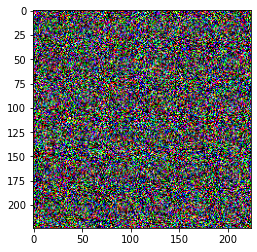

In [78]:
# fb_min = fake_banana.min()
# fb_range = fake_banana.max() - fb_min

# fake_banana += fb_min
# fake_banana /= fb_range

# print(fake_banana.min())

plt.imshow(fake_banana)

In [79]:
!ls ../data

cifar-10-batches-py  cifar-10-python.tar.gz  dog1.jpg  dog2.jpg  MNIST


In [80]:
dog1 = Image.open("../data/dog1.jpg")

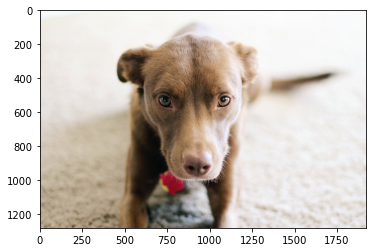

In [81]:
plt.imshow(dog1)

In [82]:
type(dog1)

PIL.JpegImagePlugin.JpegImageFile

In [83]:
model(dog1)

TypeError: conv2d() received an invalid combination of arguments - got (JpegImageFile, Parameter, Parameter, tuple, tuple, tuple, int), but expected one of:
 * (Tensor input, Tensor weight, Tensor bias, tuple of ints stride, tuple of ints padding, tuple of ints dilation, int groups)
      didn't match because some of the arguments have invalid types: (!JpegImageFile!, !Parameter!, !Parameter!, !tuple!, !tuple!, !tuple!, int)
 * (Tensor input, Tensor weight, Tensor bias, tuple of ints stride, str padding, tuple of ints dilation, int groups)
      didn't match because some of the arguments have invalid types: (!JpegImageFile!, !Parameter!, !Parameter!, !tuple!, !tuple!, !tuple!, int)


In [84]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

In [85]:
dog1tensor = preprocess(dog1)

In [86]:
type(dog1tensor), dog1tensor.shape

(torch.Tensor, torch.Size([3, 224, 224]))

In [87]:
yhat = model(dog1tensor.unsqueeze(0))
class_index = yhat.squeeze().argmax()
class_index

tensor(215)

In [88]:
labels[str(class_index.item())]

['n02101388', 'Brittany_spaniel']